# Получение текстовых данных.

**Получение текстовых данных**

Цель  получить текстовый набор данных для последующего анализа. \
Используемые библиотеки: \
requests (для отправки HTTP-запросов) и BeautifulSoup (для парсинга HTML)

In [ ]:
# импорт библиотек
import requests
import pandas as pd
import time
import csv
from bs4 import BeautifulSoup
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
url = 'https://www.wowhead.com/news' # url сайта для парсинга
r = requests.get(url) # отправка GET-запроса для получения страницы
with open('comment_page.html', 'wb') as output_file: # сохранение полученной страницы
  output_file.write(r.text.encode())

r.text # страница сайта

Информация о блоке
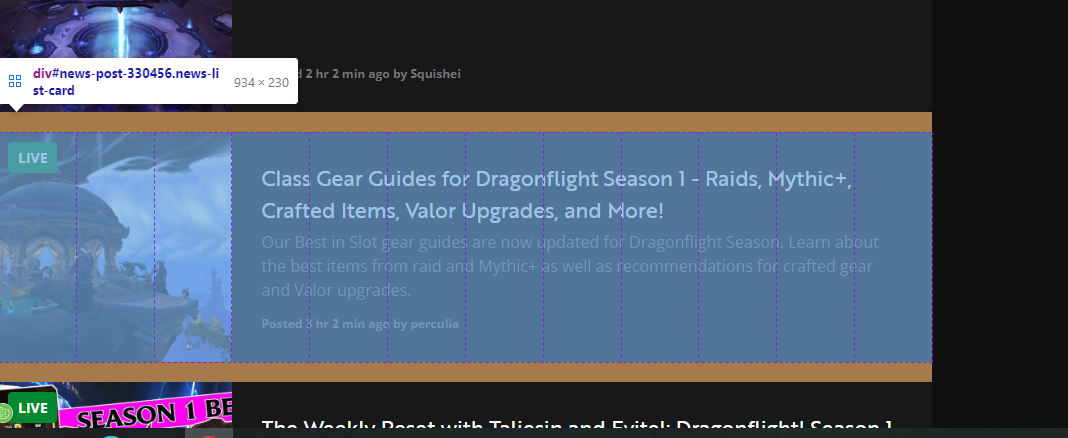


In [ ]:
s = requests.Session() # создание сессии  
url = 'https://www.wowhead.com/news'
request = s.get(url, timeout=(3.05, 27)) # получение страницы 

soup = BeautifulSoup(request.text, features="lxml") # создание объекта BeautifulSoup для работы с DOM моделью
location_blocks = soup.findAll('div', {'news-list-card'}) # получение всех div с классом 'news-list-card', который содержит всю необходимую информацию с блоком новостей

print(location_blocks)

In [ ]:
# Получаем информацию об названиях заголовков новостей 
location= []
for block in location_blocks:
    location.append(block.find(class_="heading-size-2").find('a').text.replace('\n','')) # выбираем heading-size который соответсвует местанахождению заголовка 

print(location) # список всех заголовков новостей  

In [ ]:
# получение блока с кратким описанием статьи
comments_items = soup.findAll('div', {'class': 'news-list-card-content-body'})
posted_items = soup.findAll('div', {'class': 'news-list-card-content-footer'})

comments_items[0:5] # вывод первых пяти блоков


In [ ]:
posted_items[1] # Элемент, в котором указана дата написания новости

In [ ]:
# сбор комментариев и оценки 
comments = []
sentiments = []
gametypes = []
  
for items in comments_items:
    comment = items.find('noscript').text.replace('\n','')               
    comments.append(comment)

for items in location_blocks:    
    sentiment = items.find('span', {'class': 'news-list-card-content-byline-date'}).text
    sentiments.append(sentiment)
    gametype =  items.find('a',{'class': 'news-list-card-type fa fa-thumb-tack'}).text.replace('\n','') 
    gametypes.append(gametype)
    




comments[1]

In [ ]:
sentiments[0:2] # список времени когда была написана новость

In [ ]:
gametypes[0:19]  #список типов игры, по которым написана новость

In [ ]:
comments # список комментариев на странице

In [ ]:
# собираем все вместе
s = requests.Session() 

titles = ['bodytext', 'timepost', 'author', 'gametype','titlenews'] # данные которые будем сохранять

with open('harvest_data.csv', mode="w", encoding='utf-8') as f: # создаем файл для хранения данных
     writer  = csv.writer(f)
     writer.writerow(titles)

def load_comment_page(page, session): # функция обхода страниц, принимает объект для создания запросов и номер страницы    
    url = 'https://www.wowhead.com/news?page='+str(page)    
    request = session.get(url,timeout=(3.05, 27))    
    return request.text

def contain_comment_data(text): # функция для получения данных со страницы, принмает на вход HTML

    soup = BeautifulSoup(text, features="lxml") # создаем объект BeautifulSoup для взаимодействия с DOM-моделью
    location_blocks = soup.findAll('div', {'news-list-card'}) # получение всех div с классом 'news-list-card', который содержит всю необходимую информацию
    
    location= []
    for block in location_blocks:
        location.append(block.find(class_="heading-size-2").find('a').text.replace('\n',''))
    
    comments_items = soup.findAll('div', {'class': 'news-list-card-content-body'}) # получаем все div содержащие инофрмацию о новости
    
    it = 0
    
    
    
    for items in location_blocks: # делаем обход всех блоков и собираем необходимую информацию

        
        data = [] # в этом списке будем хранить информацию
        
        bodytext = items.find('noscript').text.replace('\n','').replace(',', '*') # выбираем тег содержащий описание новости
                     
        data.append(bodytext)
        comments.append(bodytext)
    
        
        timepost = items.find('span', {'class': 'news-list-card-content-byline-date'}).text # выбираем тег содержащий время написания новости 
        if timepost: # делаем проверку на наличие оценки
            data.append(timepost)
        else:
            data.append(-1)        
            
                    
        author = items.find('a', {'rel':'author'}).text # выбираем тег содержащий автора новости 
        if author: # делаем проверку на наличие оценки
            data.append(author)
        else:
            data.append(-1)
                
        gametype =  items.find('a',{'class': 'news-list-card-type fa fa-thumb-tack'}).text.replace('\n','')  # выбираем тег содержащий тип игры в новости 
        if gametype[it]: # делаем проверку на наличие оценки
            data.append(gametype)
        else:
            data.append(-1)
                
                
        if location[it]: #  
            data.append(location[it])
        else:
            data.append(-1)

        
        
        it+=1
        with open('harvest_data.csv',  mode="a", encoding='utf-8') as f: # записываем строчку с данными в файл
            writer = csv.writer(f)
            writer.writerow(data)
    
    return location_blocks


page = 0
max_page = 10
while page < max_page: # цикл обхода страниц для сбора информации
    print(page)
    time.sleep(0.1)
    page_content = load_comment_page(page, s)    
    if contain_comment_data(page_content):        
        page += 1 # переходим по страницам и видим в адресной строке измение на 11

    else:
       break

print("data saved")

df = pd.read_csv('/content/harvest_data.csv')
df.head()

0
1
2
3
4
5
6
7
8
9
data saved


,bodytext,timepost,author,gametype,titlenews
0,With Dragonflight Season 1 arriving with this ...,1 day ago,Jaydaa,Live,"Best Talent Builds for All Classes - Raid, Myt..."
1,We have updated our Dragonflight tier lists to...,1 day ago,Wowhead,Live,Dragonflight Tier Lists Updated for December 1...
2,Primalist Invasions are a new type of event th...,2 days ago,perculia,Live,Primal Storms in Dragonflight Season 1 - New O...
3,Wowhead's class guides are now updated for Dra...,2 days ago,perculia,Live,Class Guides Updated for Dragonflight Season 1...
4,The first raid of Dragonflight* Vault of the I...,2 days ago,perculia,Live,Vault of the Incarnates Raid Strategy Guides a...


In [ ]:
print(df.to_string())

**Задание:** \
Для сайта по варианту получить набор данных